In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
def getInfo(data):
    print(data.info(memory_usage=False, verbose=True))

In [17]:
def getDescription(data, columns=None):
    print(data.describe(include=columns).T)

In [18]:
def plotNumCol(data, column):
    plt.figure(figsize=(8,4))
    sns.histplot(data, x=column)

In [24]:
def plotCatCol(data, column):
    plt.figure(figsize=(8,4))
    sns.countplot(data=data, x=column)

In [32]:
def bivariateScatter(x, y, hue, data):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=x, y=y, hue=hue, data=data)

In [37]:
def checkHypothesis(value):
    if value < 0.05:
        return('Reject Null Hypothesis')
    else:
        return('Fail to reject Null Hypothesis')

In [73]:
def plotHist(data):
    data.hist(figsize=(15,15))

In [2]:
dataset = pd.read_csv('segmentation data.csv')

In [3]:
getInfo(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)None


In [7]:
getDescription(dataset)

         count          mean           std          min           25%  \
ID      2000.0  1.000010e+08    577.494589  100000001.0  1.000005e+08   
Age     2000.0  3.590900e+01     11.719402         18.0  2.700000e+01   
Income  2000.0  1.209544e+05  38108.824679      35832.0  9.766325e+04   

                50%           75%          max  
ID      100001000.5  1.000015e+08  100002000.0  
Age            33.0  4.200000e+01         76.0  
Income     115548.5  1.380722e+05     309364.0  


In [4]:
categorical_columns = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']
numerical_columns = ['Age', 'Income']

In [5]:
modified_dataset = dataset
modified_dataset[categorical_columns] = modified_dataset[categorical_columns].astype('str')

In [6]:
getInfo(modified_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)None


In [8]:
getDescription(modified_dataset, columns='object')

                count unique top  freq
Sex              2000      2   0  1086
Marital status   2000      2   0  1007
Education        2000      4   1  1386
Occupation       2000      3   1  1113
Settlement size  2000      3   0   989


In [9]:
getDescription(modified_dataset)

         count          mean           std          min           25%  \
ID      2000.0  1.000010e+08    577.494589  100000001.0  1.000005e+08   
Age     2000.0  3.590900e+01     11.719402         18.0  2.700000e+01   
Income  2000.0  1.209544e+05  38108.824679      35832.0  9.766325e+04   

                50%           75%          max  
ID      100001000.5  1.000015e+08  100002000.0  
Age            33.0  4.200000e+01         76.0  
Income     115548.5  1.380722e+05     309364.0  


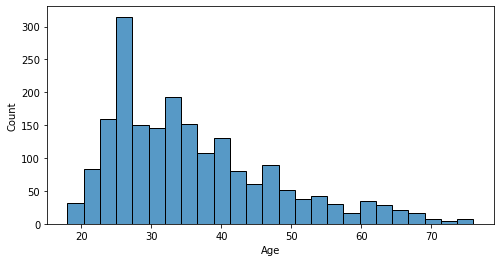

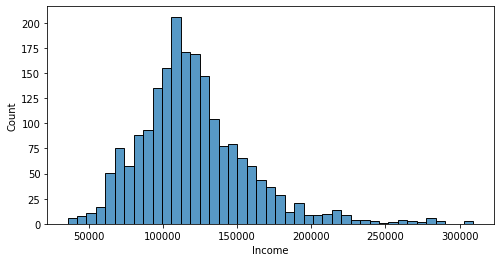

In [19]:
for column in numerical_columns:
    plotNumCol(modified_dataset, column)

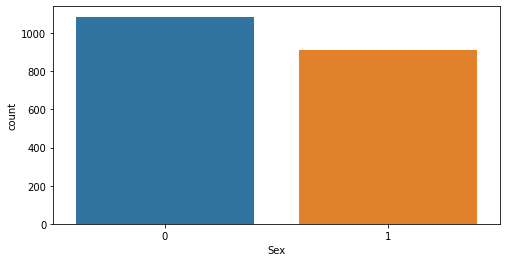

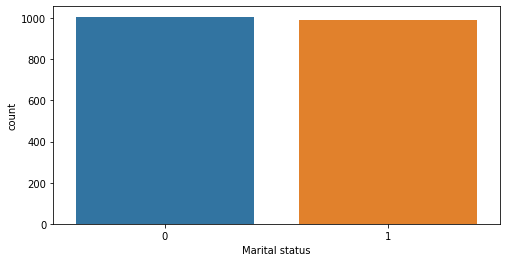

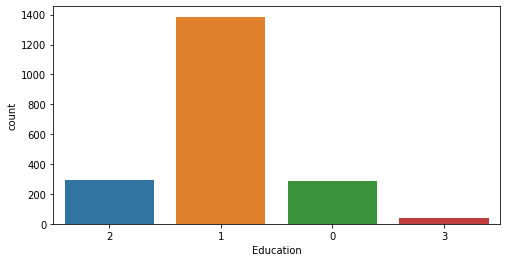

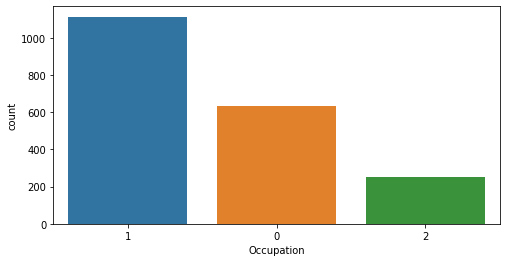

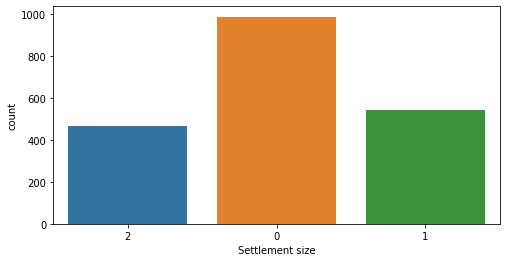

In [25]:
for column in categorical_columns:
    plotCatCol(data=modified_dataset, column=column)

In [28]:
modified_dataset[numerical_columns].corr()

,Age,Income
Age,1.00000,0.34061
Income,0.34061,1.00000


<AxesSubplot:xlabel='Age', ylabel='Income'>

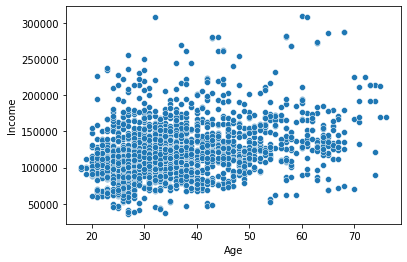

In [29]:
sns.scatterplot(x='Age', y='Income', data=modified_dataset)

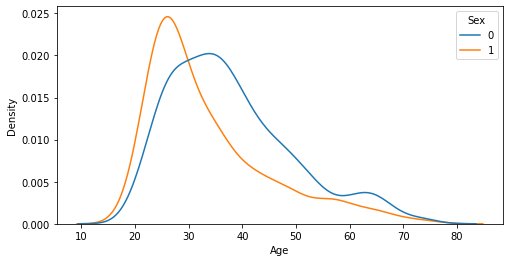

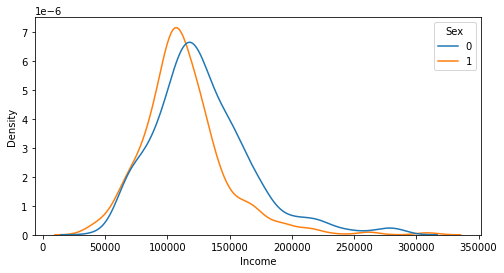

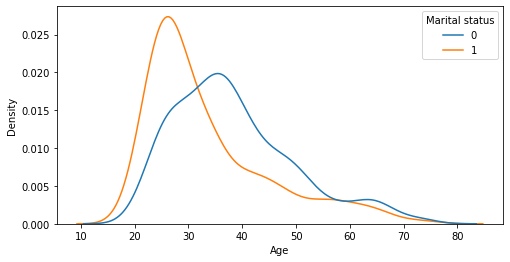

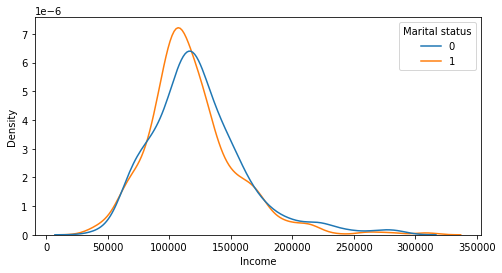

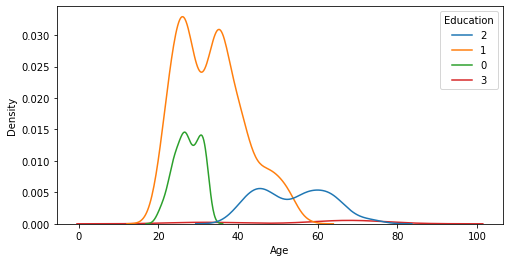

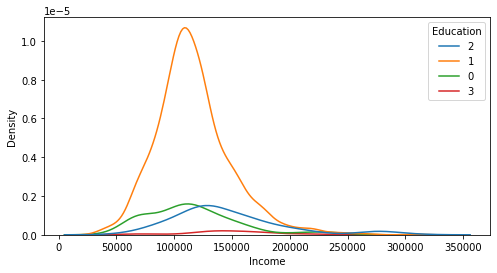

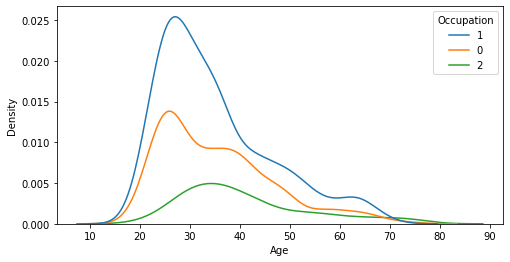

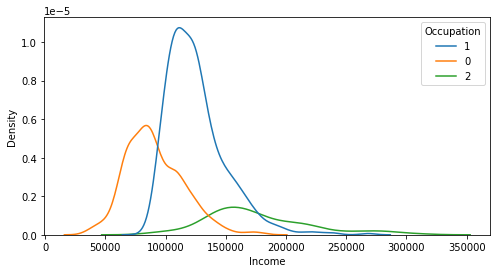

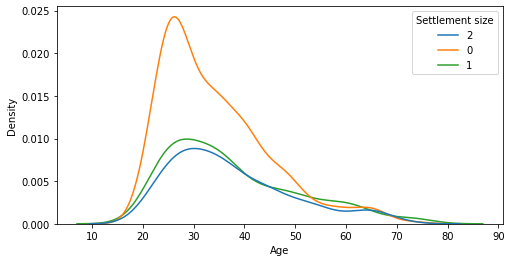

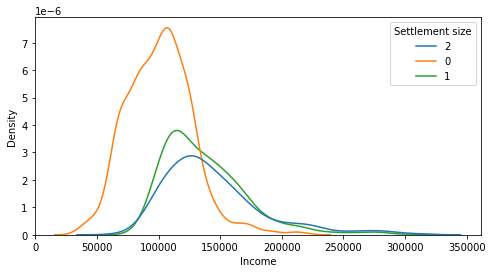

In [30]:
for category in categorical_columns:
    for numerical in numerical_columns:
        plt.figure(figsize=(8,4))
        sns.kdeplot(data=modified_dataset, x=numerical, hue=category)

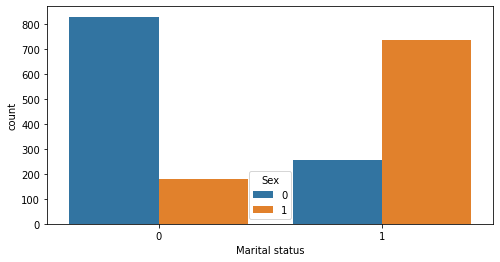

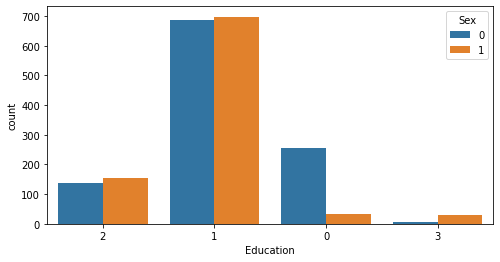

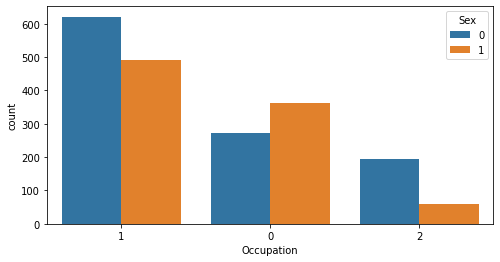

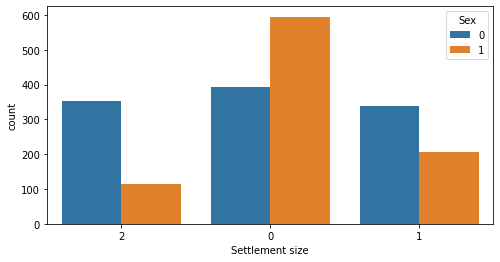

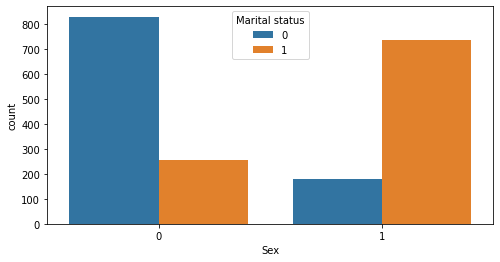

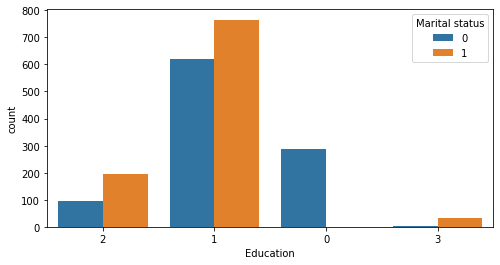

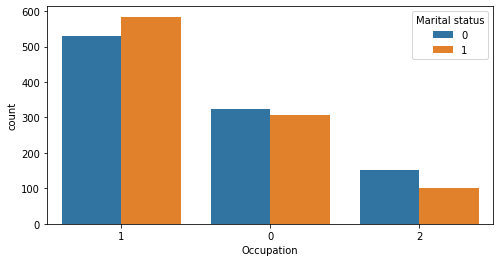

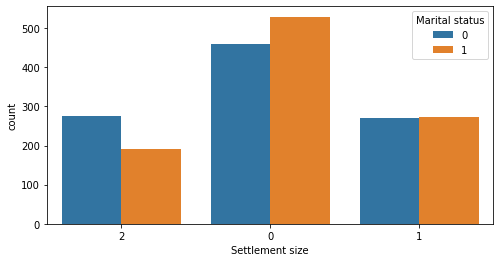

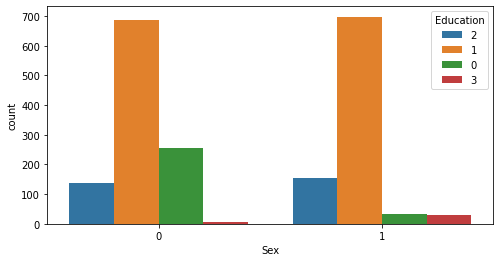

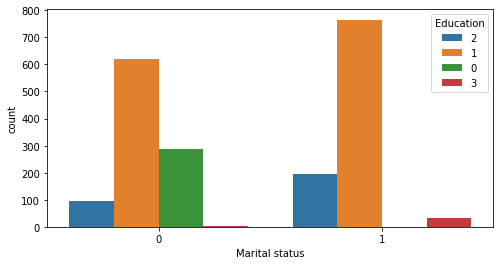

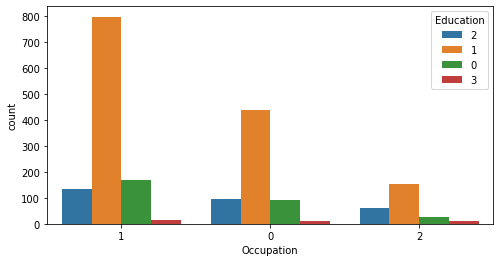

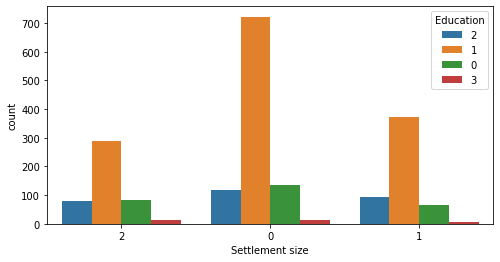

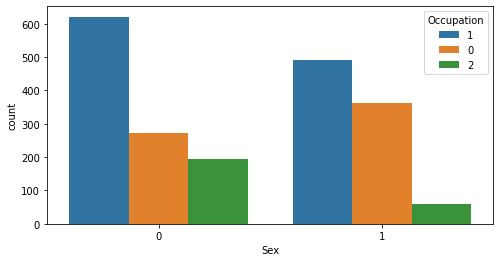

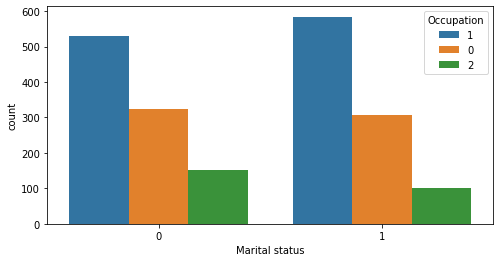

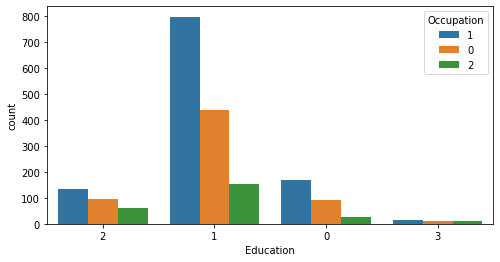

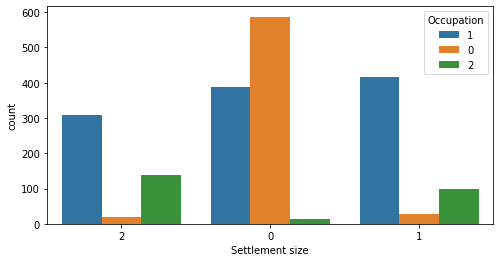

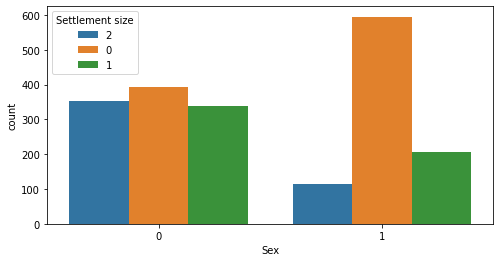

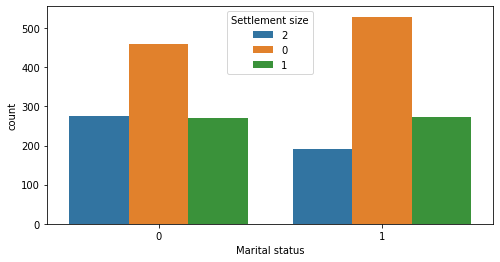

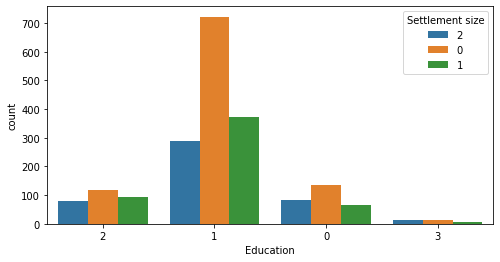

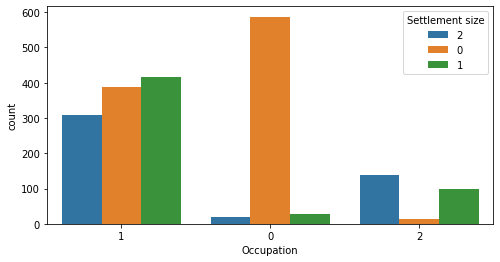

In [31]:
for category1 in categorical_columns:
    for category2 in categorical_columns:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=modified_dataset, x=category2, hue=category1)

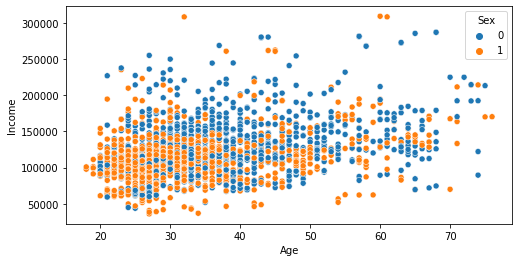

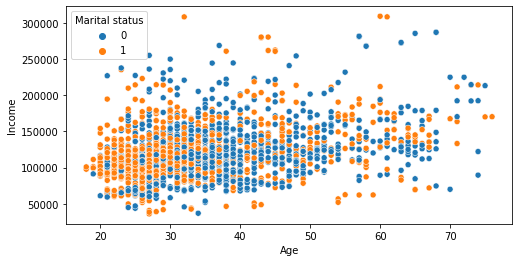

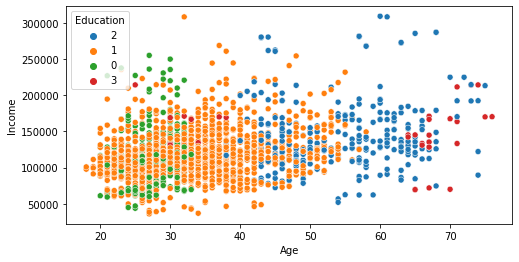

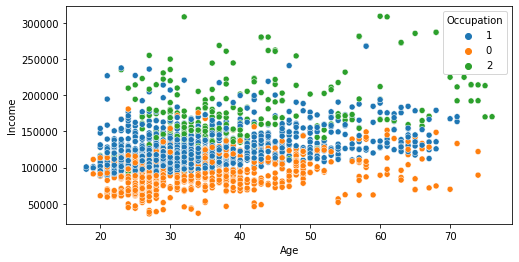

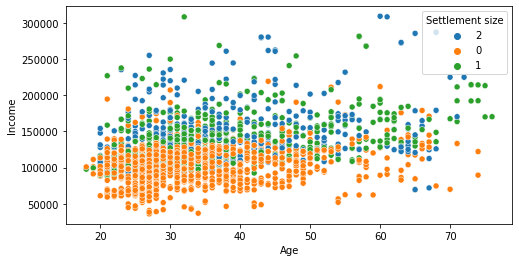

In [33]:
for category in categorical_columns:
    bivariateScatter(x='Age', y='Income', hue=category, data=modified_dataset)

In [39]:
hypothesis_income = normaltest(modified_dataset['Income'])[1]
hypothesis_age = normaltest(modified_dataset['Age'])[1]

print(f'Null Hypothesis: Income is normally distributed\nAlternate Hypothesis: Income is not normally distributed')
print(f'The p-value of Income is : {hypothesis_income}')
print(f'{checkHypothesis(hypothesis_income)}\n')

print(f'Null Hypothesis: Age is normally distributed\nAlternate Hypothesis: Age is not normally distributed')
print(f'The p-value of Age is : {hypothesis_age}')
print(f'{checkHypothesis(hypothesis_income)}\n')

Null Hypothesis: Income is normally distributed
Alternate Hypothesis: Income is not normally distributed
The p-value of Income is : 2.5009638879187734e-98
Reject Null Hypothesis

Null Hypothesis: Age is normally distributed
Alternate Hypothesis: Age is not normally distributed
The p-value of Age is : 3.3428344869999675e-56
Reject Null Hypothesis



In [43]:
def apply_log(column):
    return np.log(column)

def normal_test(column):
    return normaltest(column)

In [54]:
featureIncome = modified_dataset['Income'].to_numpy().reshape(-1, 1)

powerTransform = PowerTransformer()
feature_transform = powerTransform.fit_transform(featureIncome)
feature_array = feature_transform.flatten()
featureIncome = pd.Series(data=feature_array, index=list(range(len(feature_array))))

In [55]:
transformed_income = apply_log(modified_dataset['Income'])

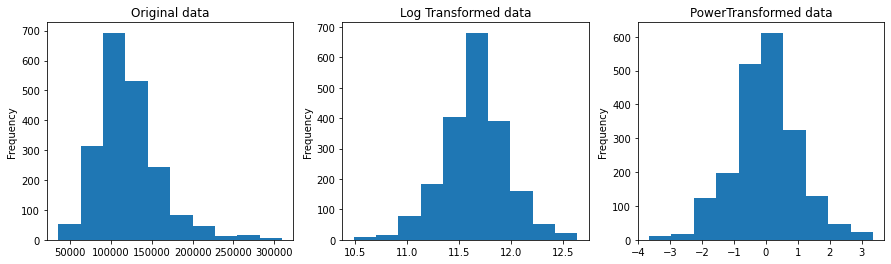

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

modified_dataset['Income'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normal_test(modified_dataset['Income'])

transformed_income.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normal_test(transformed_income)

featureIncome.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normal_test(featureIncome)

In [57]:
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])

In [58]:
metrics

,statistic,pvalue
Original data,449.473326,2.500964e-98
Log transform,32.357037,9.413664e-08
PowerTransformer,27.859212,8.921730e-07


In [49]:
feature = modified_dataset['Age'].to_numpy().reshape(-1, 1)

powerTransform = PowerTransformer()
feature_transform = powerTransform.fit_transform(feature)
feature_array = feature_transform.flatten()
feature = pd.Series(data=feature_array, index=list(range(len(feature_array))))

In [50]:
transformed_age = apply_log(modified_dataset['Age'])

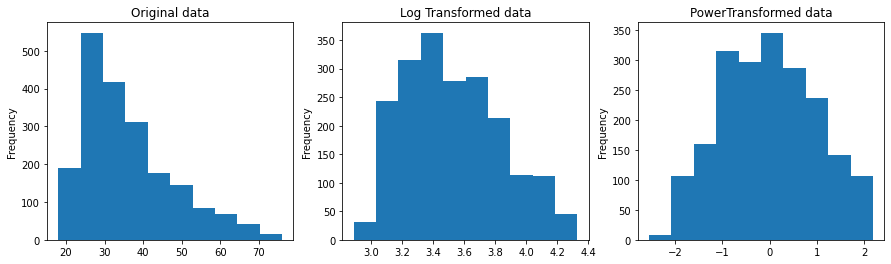

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4));

modified_dataset['Age'].plot(kind='hist', ax=ax1)
ax1.title.set_text('Original data')
norm_test1 = normal_test(modified_dataset['Age'])

transformed_age.plot(kind='hist', ax=ax2);
ax2.title.set_text('Log Transformed data')
norm_test2 = normal_test(transformed_age)

feature.plot(kind='hist', ax=ax3);
ax3.title.set_text('PowerTransformed data')
norm_test3 = normal_test(feature)

In [52]:
norm_results = [norm_test1, norm_test2, norm_test3]
metrics = pd.DataFrame(norm_results, index=['Original data', 'Log transform', 'PowerTransformer'])
metrics

,statistic,pvalue
Original data,255.475892,3.342834e-56
Log transform,111.094201,7.519703e-25
PowerTransformer,161.196197,9.924088e-36


In [59]:
modified_dataset['Transformed Income'] = featureIncome
modified_dataset['Transformed Age'] = transformed_age

In [60]:
customer_dataset = modified_dataset.drop(['ID', 'Income', 'Age'], axis = 1)
customer_dataset

,Sex,Marital status,Education,Occupation,Settlement size,Transformed Income,Transformed Age
0,0,0,2,1,2,0.239545,4.204693
1,1,1,1,1,2,0.869781,3.091042
2,0,0,1,0,0,-0.846121,3.891820
3,0,0,1,1,1,1.303766,3.806662
4,0,0,1,1,1,0.830970,3.970292
...,...,...,...,...,...,...,...
1995,1,0,1,0,0,0.209208,3.850148
1996,1,1,1,1,0,0.051991,3.295837
1997,0,0,0,0,0,-0.948374,3.433987
1998,1,1,1,0,0,-0.545364,3.178054


In [62]:
scaler = MinMaxScaler()
X = scaler.fit_transform(customer_dataset)

In [63]:
X[0:5]

array([[0.        , 0.        , 0.66666667, 0.5       , 1.        ,
        0.55651051, 0.91249369],
       [1.        , 1.        , 0.33333333, 0.5       , 1.        ,
        0.64653199, 0.13931967],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ,
        0.40143673, 0.69527579],
       [0.        , 0.        , 0.33333333, 0.5       , 0.5       ,
        0.70852134, 0.63615327],
       [0.        , 0.        , 0.33333333, 0.5       , 0.5       ,
        0.64098819, 0.74975629]])

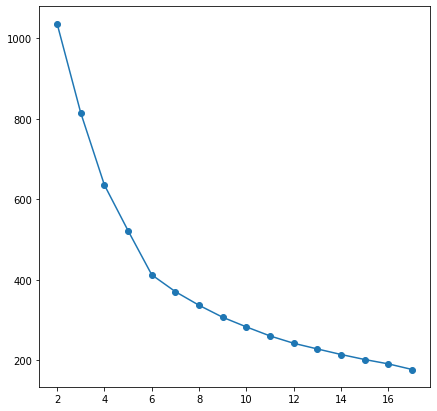

In [64]:
cluster_range = [i for i in range(2, 18)]
inertias = []

for cluster in cluster_range:
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(cluster_range, inertias, marker='o')

In [66]:
kmeans = KMeans(n_clusters=6).fit(X)
labels = kmeans.labels_

In [67]:
customer_dataset['Label'] = labels

In [80]:
results = modified_dataset.drop(['ID', 'Transformed Income', 'Transformed Age'], axis = 1)
results['Label'] = labels
results = results.astype({'Sex':'int32', 'Marital status':'int32', 'Education':'int32', 'Occupation':'int32', 'Settlement size':'int32'})
getInfo(results)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int32
 1   Marital status   2000 non-null   int32
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int32
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int32
 6   Settlement size  2000 non-null   int32
 7   Label            2000 non-null   int32
dtypes: int32(6), int64(2)None


In [81]:
summary = {}

for i in range(6):
    summary[i] = results[results['Label'] == i].describe().T

                 count           mean           std      min       25%  \
Sex              430.0       1.000000      0.000000      1.0      1.00   
Marital status   430.0       1.000000      0.000000      1.0      1.00   
Age              430.0      32.416279     10.911221     18.0     25.00   
Education        430.0       1.211628      0.467453      1.0      1.00   
Income           430.0  102142.332558  25801.373992  35832.0  86281.25   
Occupation       430.0       0.427907      0.495352      0.0      0.00   
Settlement size  430.0       0.011628      0.107329      0.0      0.00   
Label            430.0       0.000000      0.000000      0.0      0.00   

                      50%        75%       max  
Sex                   1.0       1.00       1.0  
Marital status        1.0       1.00       1.0  
Age                  28.5      36.00      71.0  
Education             1.0       1.00       3.0  
Income           102323.5  120459.25  207262.0  
Occupation            0.0       1.00   

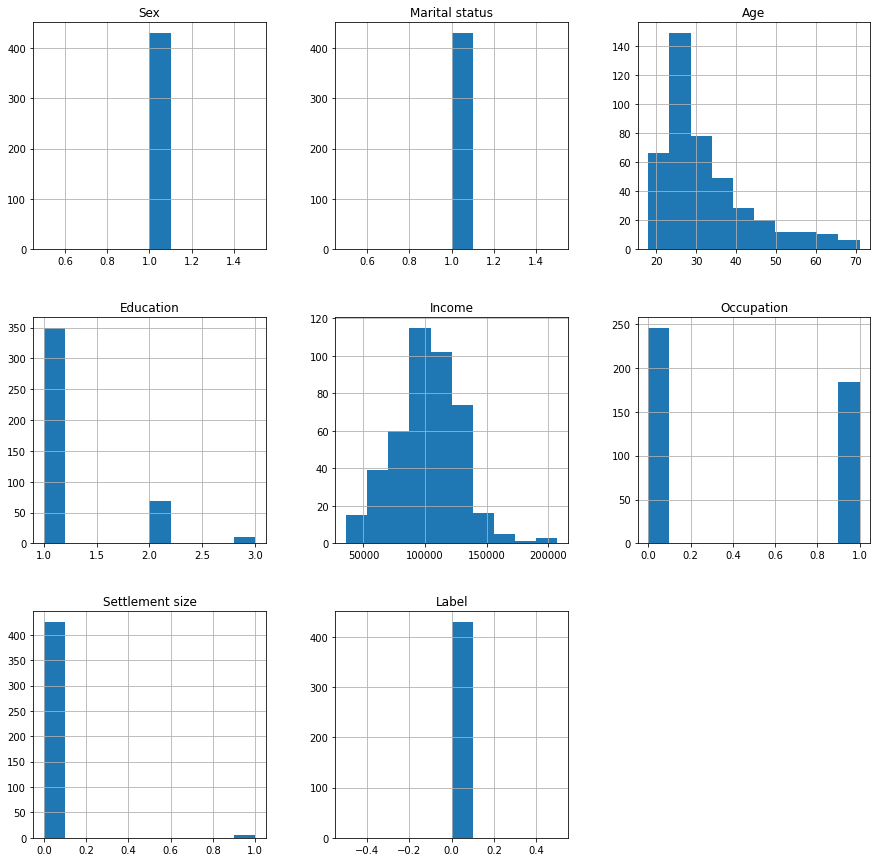

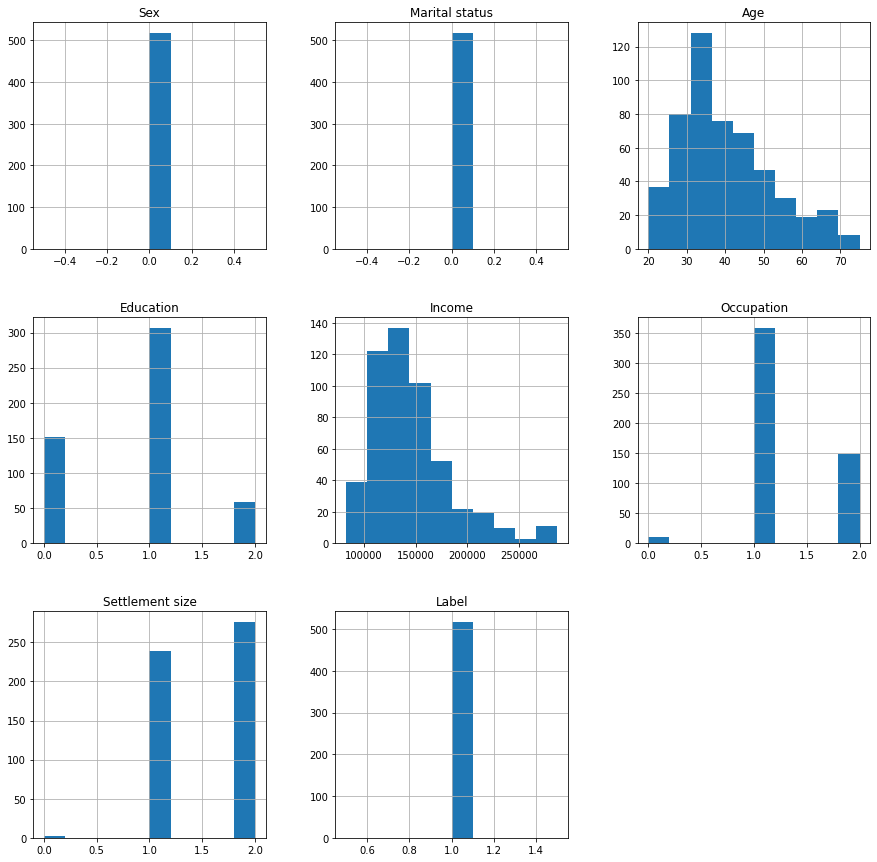

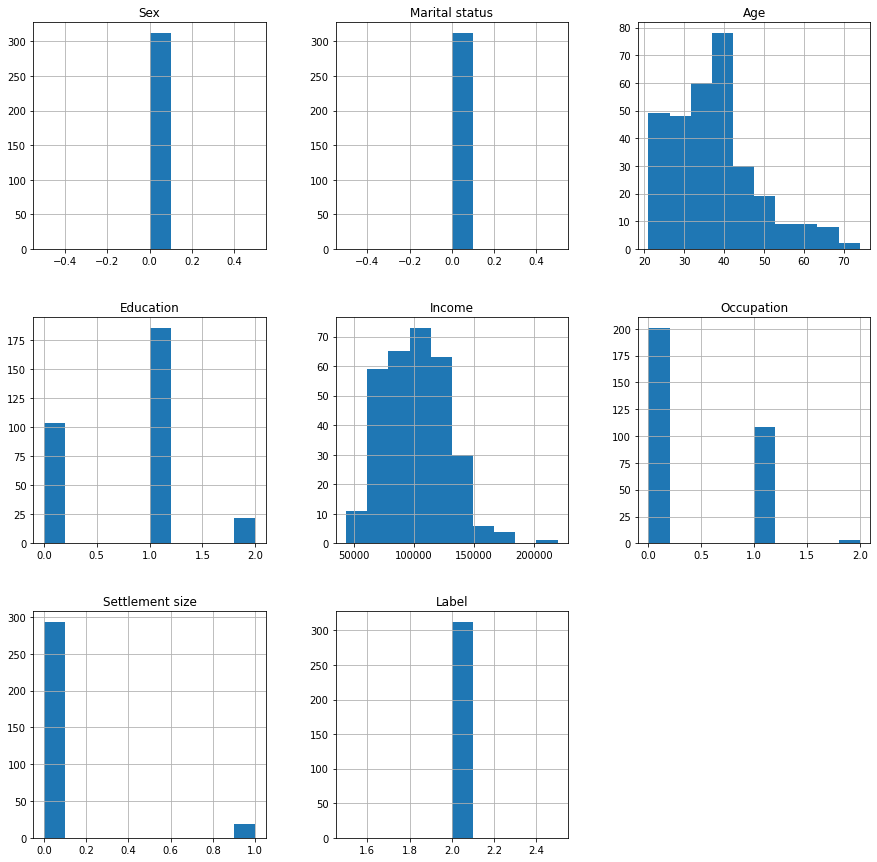

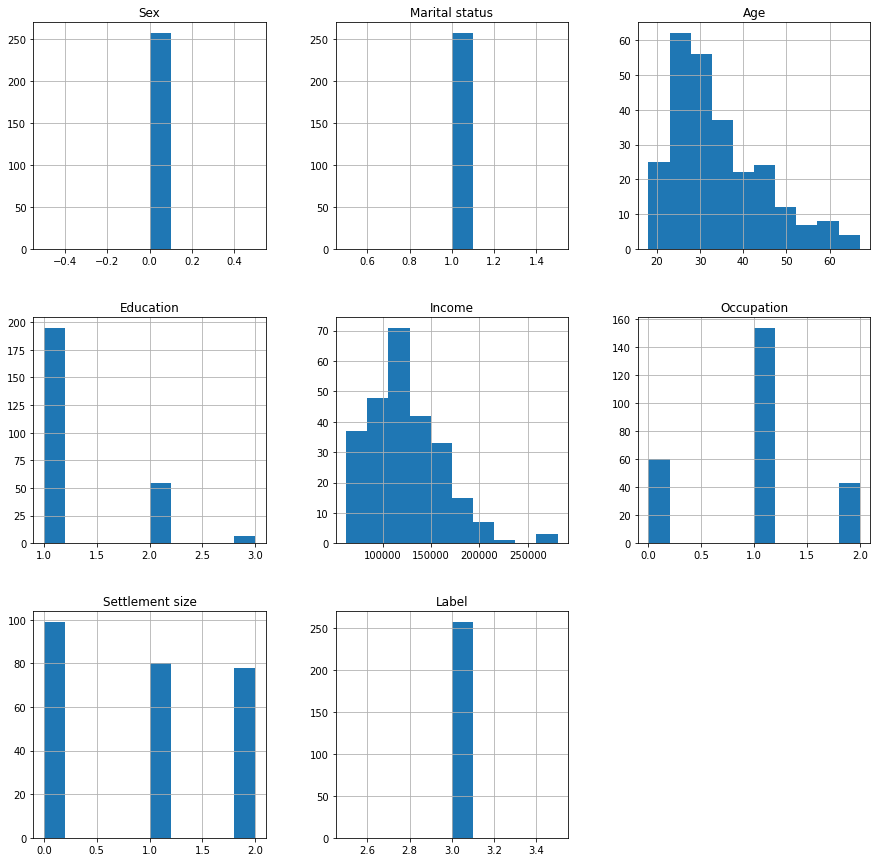

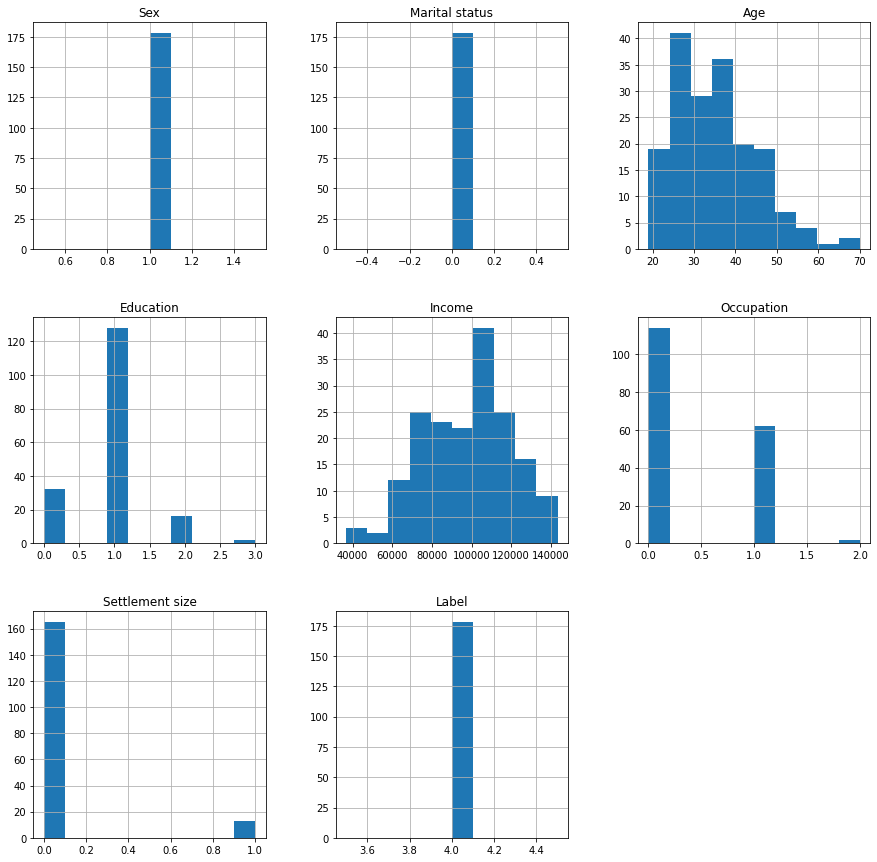

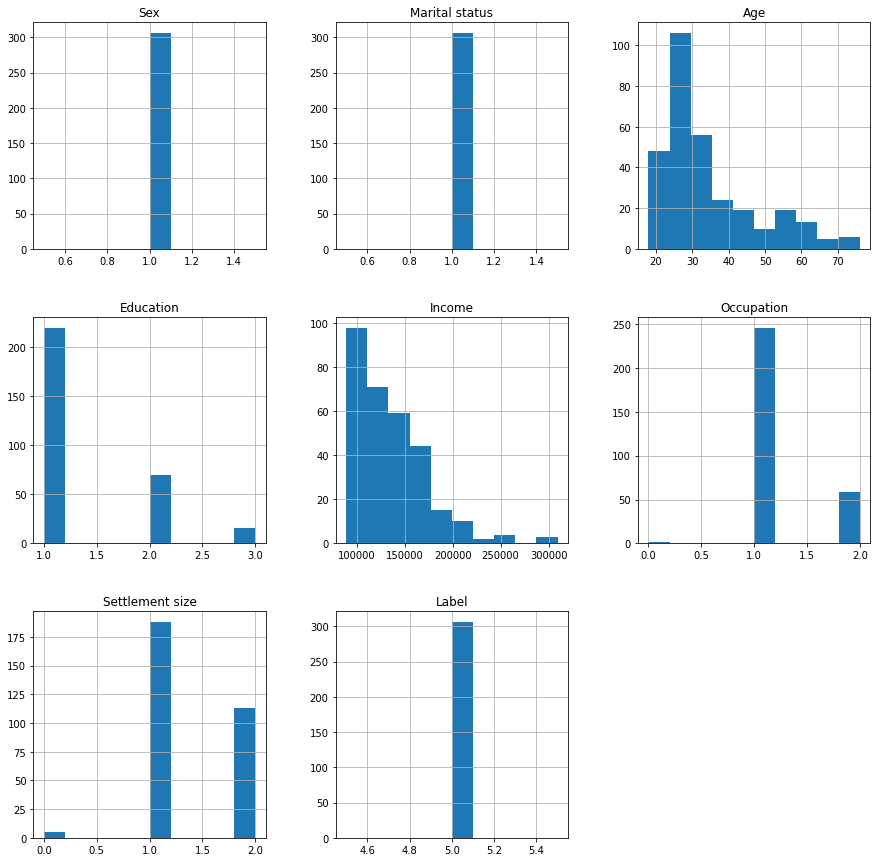

In [87]:
for i in range(6):
    print(summary[i])
    plotHist(data=results[results['Label'] == i])

In [89]:
classifier = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [90]:
X_clusters = results.drop(['Label'], axis=1)
y_clusters = results['Label']

classifier.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [93]:
predictions = classifier.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       430
           1       1.00      0.98      0.99       517
           2       0.96      1.00      0.98       312
           3       1.00      1.00      1.00       257
           4       1.00      1.00      1.00       178
           5       1.00      0.99      1.00       306

    accuracy                           0.99      2000
   macro avg       0.99      1.00      0.99      2000
weighted avg       0.99      0.99      0.99      2000



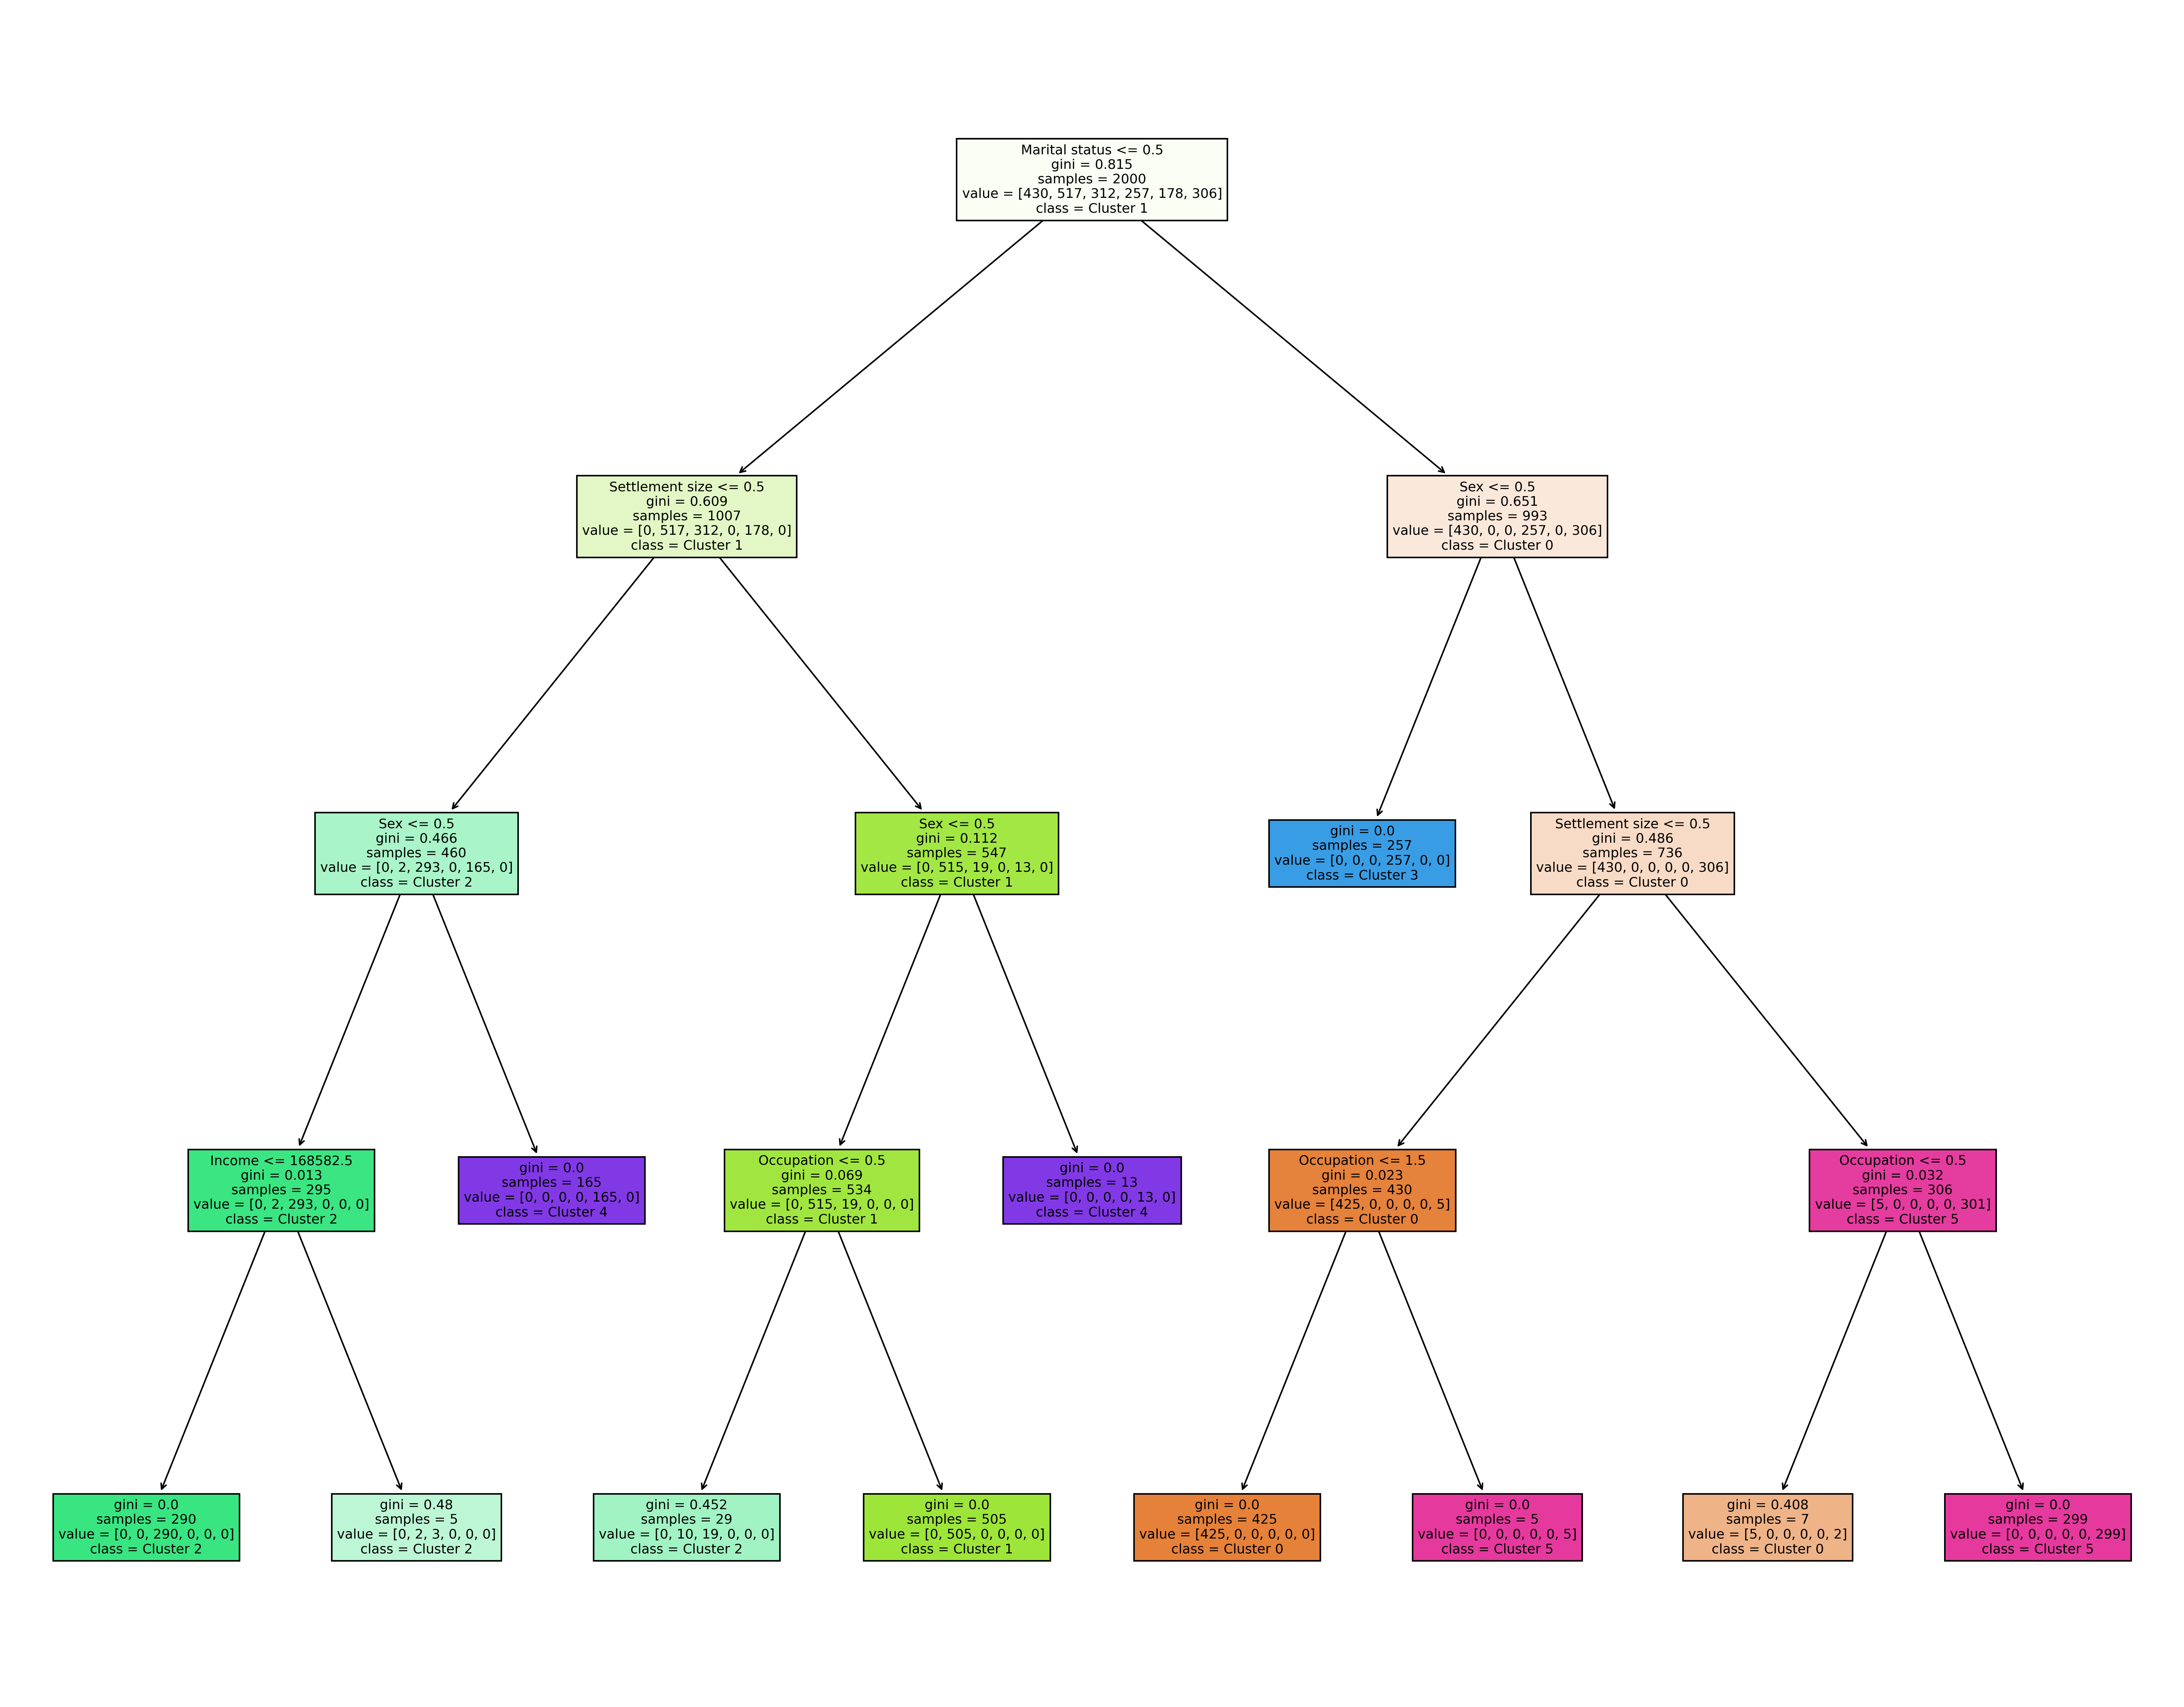

In [99]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=300)

tree.plot_tree(
    classifier,
    feature_names=results.columns[:7],
    class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
    filled=True
)
fig.savefig('tree.jpg')
